In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [108]:
#import warnings
#warnings.filterwarnings("ignore")

In [109]:
df = pd.read_csv('C:/Users/HP/Py Code/ML/Data/concrete_data.csv')
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [110]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [111]:
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

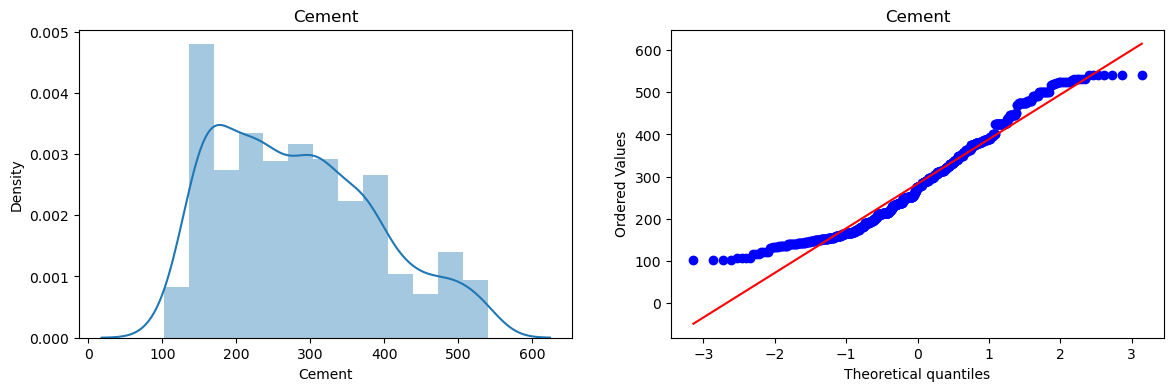

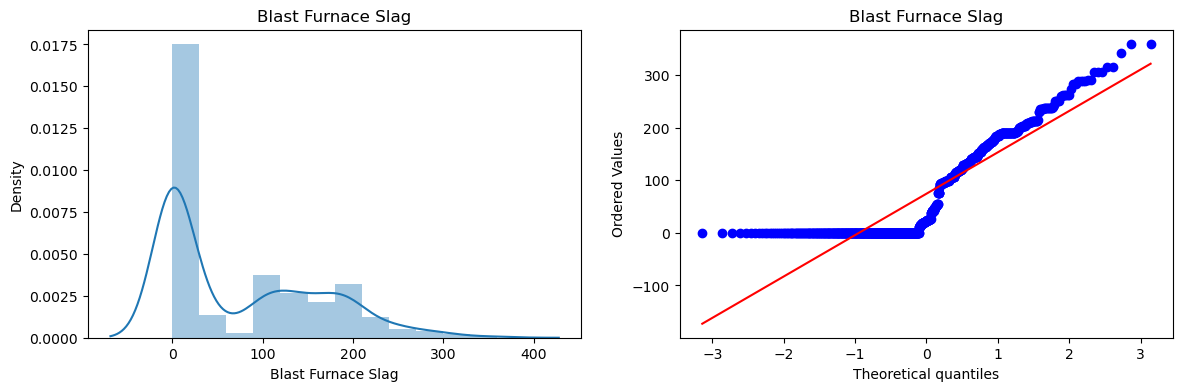

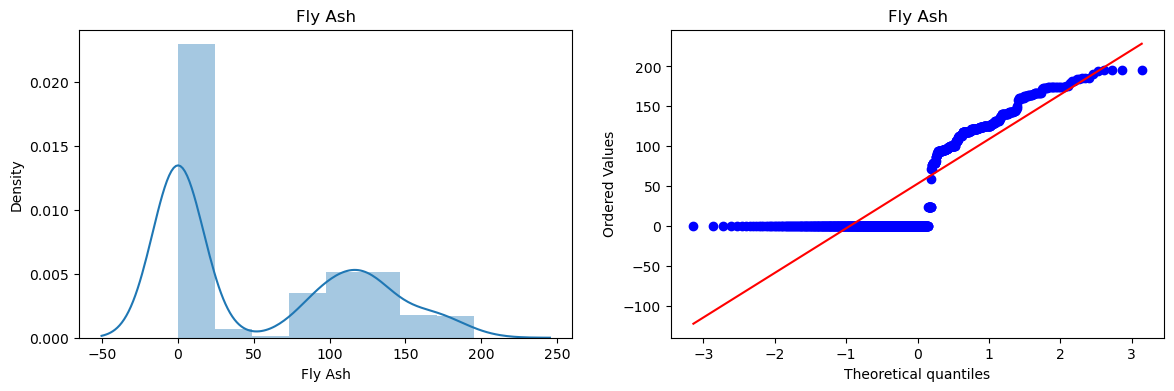

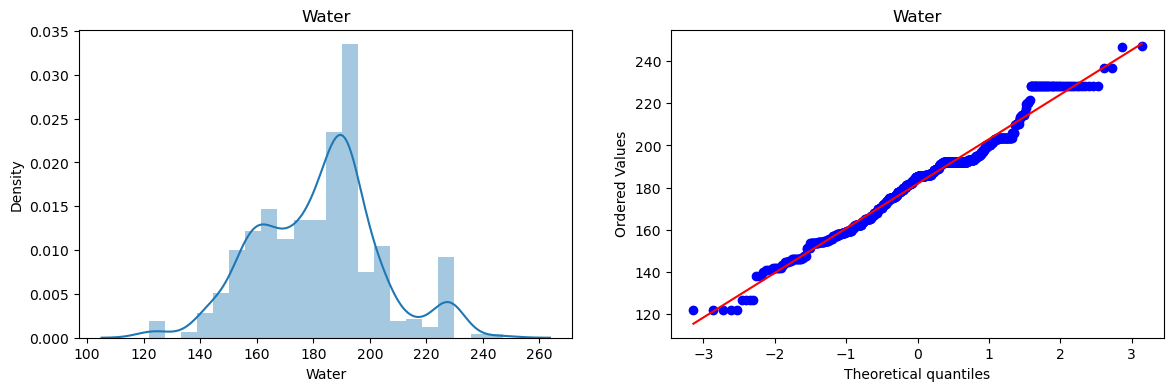

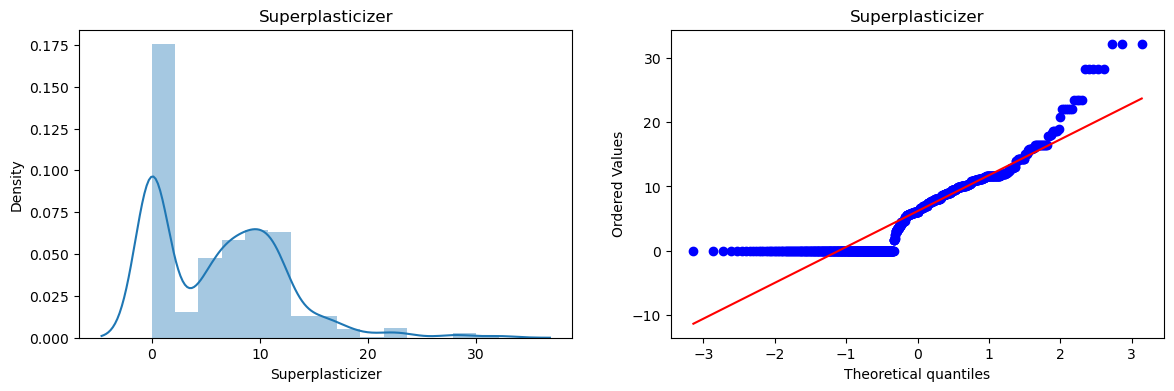

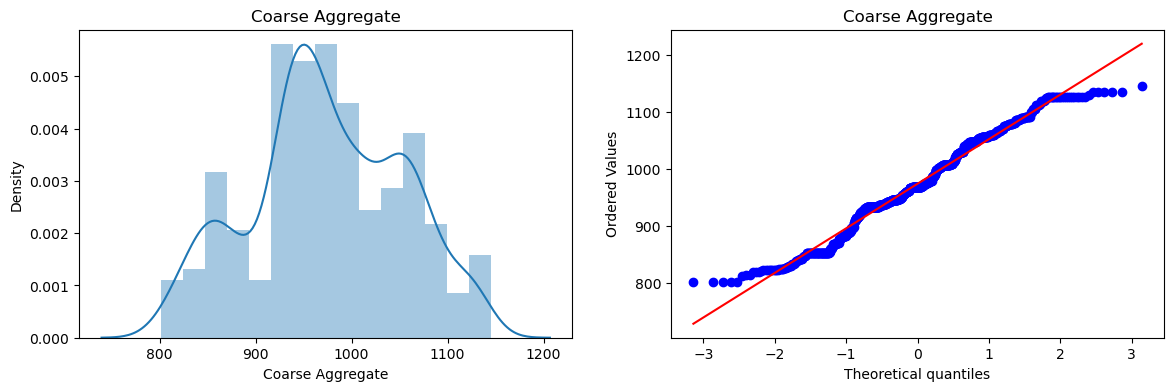

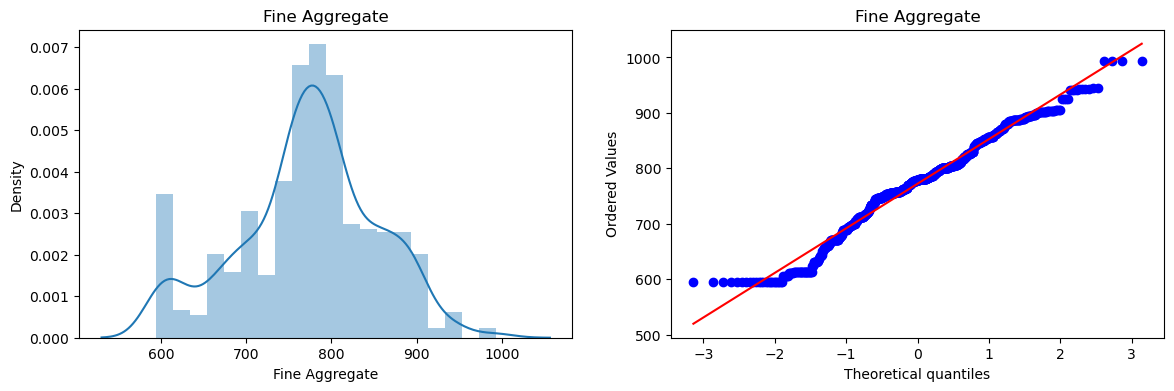

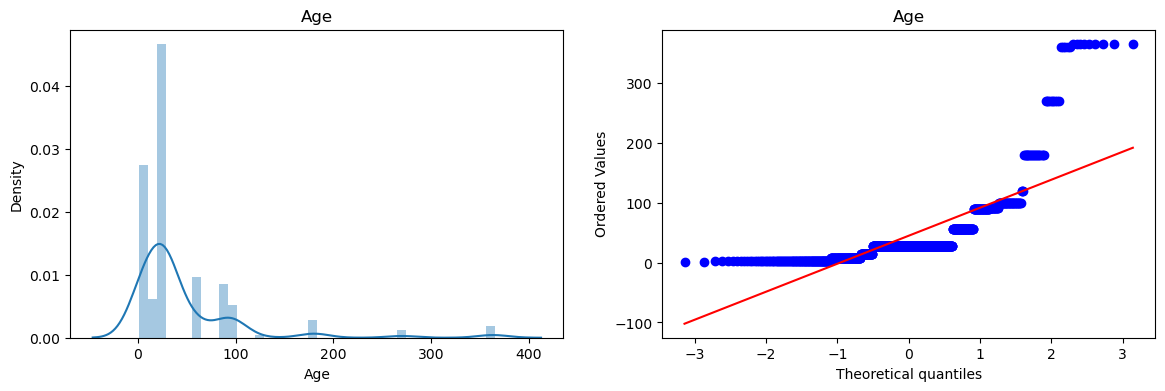

In [113]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [114]:
# Applying Regression without any transformation
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.6275531792314851

In [100]:
import numpy as np
import warnings
np.warnings = warnings

In [118]:
# Applying Box-Cox Transform

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X_train_transformed = pt.fit_transform(X_train_scaled+ 0.00001 )
X_test_transformed = pt.transform(X_test+0.000001)
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.610935
1,Blast Furnace Slag,0.065769
2,Fly Ash,0.096203
3,Water,0.972470
4,Superplasticizer,0.503125
5,Coarse Aggregate,1.018141
6,Fine Aggregate,1.149758
7,Age,-0.852038


In [123]:
# Applying linear regression on transformed data
lr1 = LinearRegression()
lr1.fit(X_train_transformed,y_train)
y_pred2 = lr1.predict(X_test_transformed)
r2_score(y_test,y_pred2)

-5296.550788879288

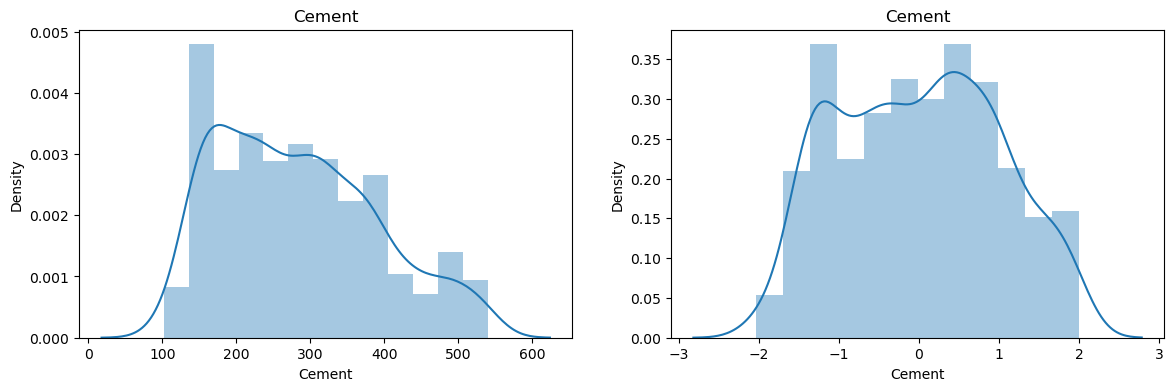

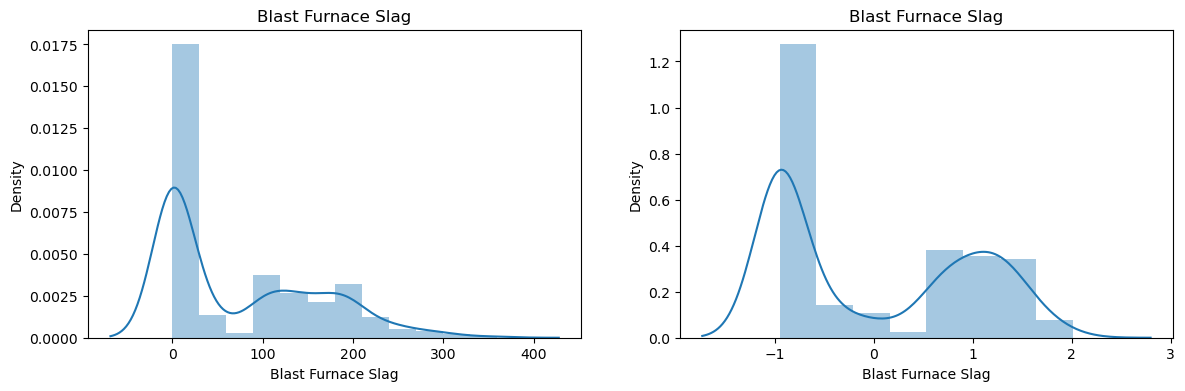

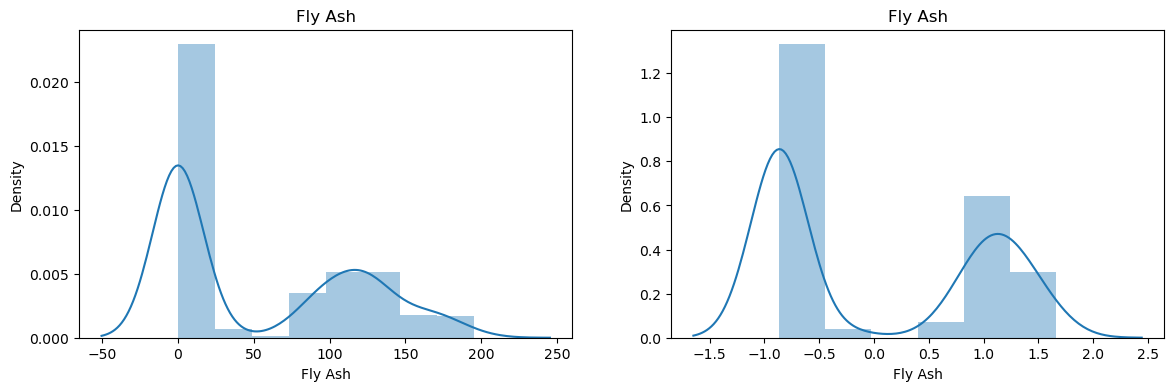

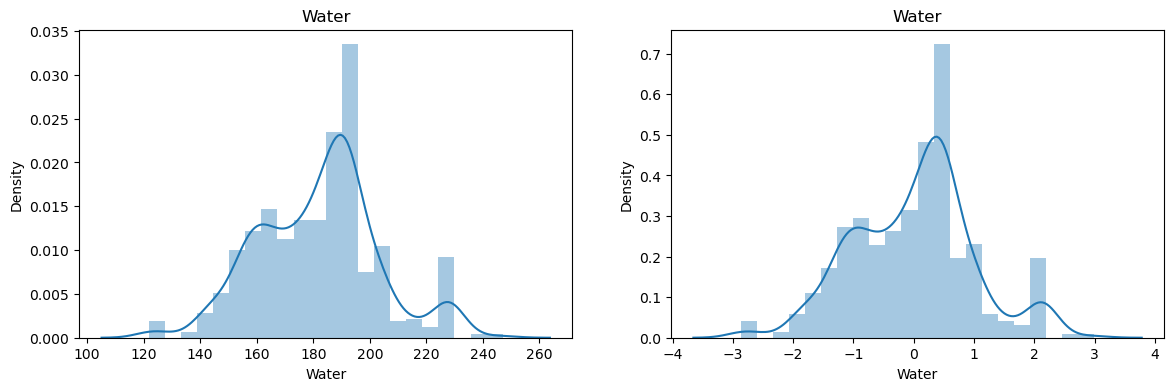

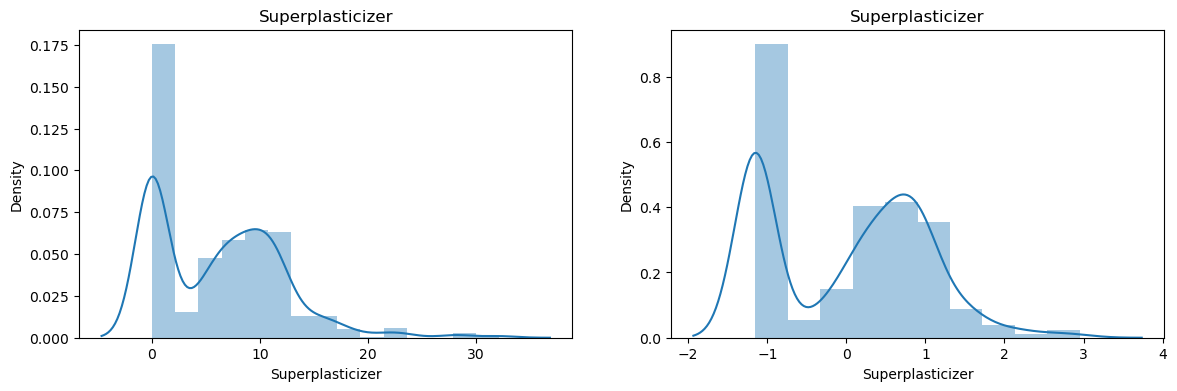

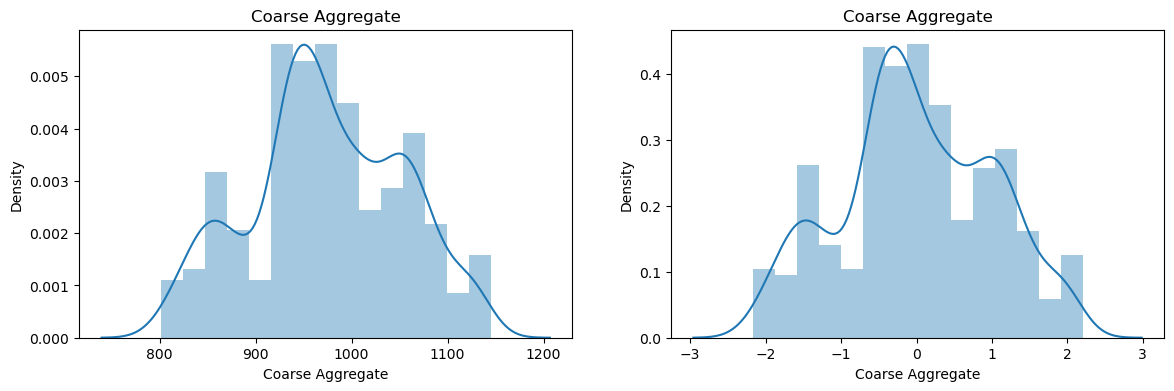

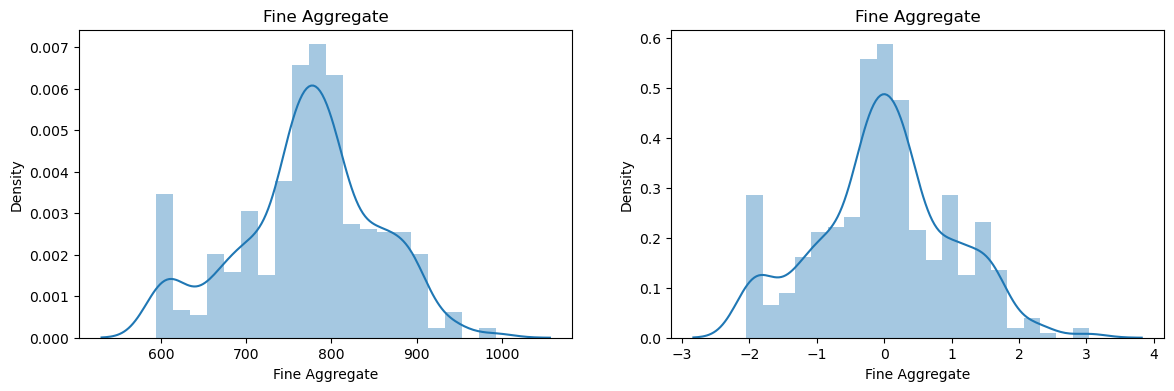

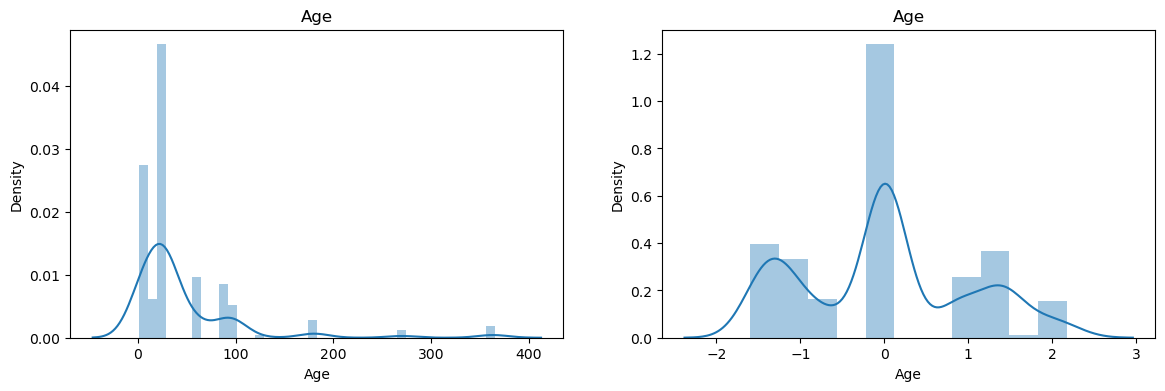

In [117]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

    plt.show()

